In [0]:
import cv2
import math
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing import image
import numpy 
from keras.utils import np_utils
from skimage.transform import resize

Using TensorFlow backend.


In [0]:
count=0
videoFile= "Tom and jerry.mp4"
cap= cv2.VideoCapture(videoFile)
frameRate = cap.get(5)

In [0]:
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


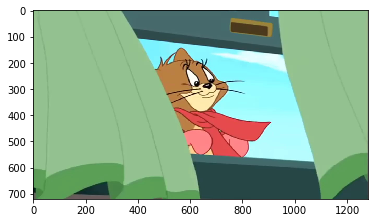

In [0]:
img = plt.imread('frame0.jpg')   # reading image using its name
plt.imshow(img)

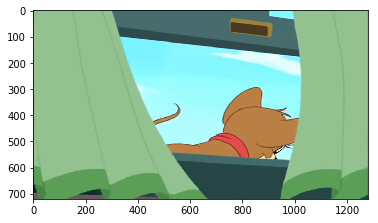

In [0]:
img = plt.imread('frame1.jpg')   # reading image using its name
plt.imshow(img)

In [0]:
data = pd.read_csv('mapping.csv')
data.head()

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


In [0]:
import numpy as np
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [0]:
y = data.Class
dummy_y = np_utils.to_categorical(y)

In [0]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [0]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X, mode='tf') 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)

In [0]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [0]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 2s 0us/step


In [0]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

((208, 7, 7, 512), (90, 7, 7, 512))

In [0]:
X_train = X_train.reshape(208, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(90, 7*7*512)

In [0]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [0]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(3, activation='softmax'))    # output layer

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Instructions for updating:
Use tf.cast instead.
Train on 208 samples, validate on 90 samples
Epoch 1/100
208/208 [==============================] - 4s 20ms/step - loss: 0.9977 - acc: 0.5385 - val_loss: 0.6730 - val_acc: 0.7111
Epoch 2/100
208/208 [==============================] - 3s 16ms/step - loss: 0.4303 - acc: 0.8269 - val_loss: 0.4781 - val_acc: 0.8222
Epoch 3/100
208/208 [==============================] - 3s 16ms/step - loss: 0.2110 - acc: 0.9038 - val_loss: 0.3788 - val_acc: 0.8111
Epoch 4/100
208/208 [==============================] - 3s 16ms/step - loss: 0.1286 - acc: 0.9567 - val_loss: 0.3357 - val_acc: 0.8667
Epoch 5/100
208/208 [==============================] - 3s 16ms/step - loss: 0.0722 - acc: 0.9904 - val_loss: 0.3186 - val_acc: 0.8778
Epoch 6/100
208/208 [==============================] - 3s 16ms/step - loss: 0.0497 - acc: 0.9904 - val_loss: 0.3677 - val_acc: 0.8222
Epoch 7/100
208/208 [==============================] - 3s 16ms/step - loss: 0.0410 - acc: 0.9952 - val_

In [0]:
count = 0
videoFile = "Tom and Jerry 3.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [0]:
test = pd.read_csv('test.csv')

In [0]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [0]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [0]:
# preprocessing the images
test_image = preprocess_input(test_image, mode='tf')

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)

# converting the images to 1-D form
test_image = test_image.reshape(186, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

In [0]:
predictions = model.predict_classes(test_image)

In [0]:
print("The screen time of JERRY is", predictions[predictions==1].shape[0], "seconds")
print("The screen time of TOM is", predictions[predictions==2].shape[0], "seconds")

The screen time of JERRY is 6 seconds
The screen time of TOM is 115 seconds
